In [1]:
##Import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
##Load the dataset
candy = pd.read_csv('candy-data.csv')
candy.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
##Create a checkpoint
candy_data = candy.copy()

##Recommended Analysis:

#1. Which candies have the highest win percentage? What do they have in common?

#2. Are more expensive candies more popular? What about sugary candies?

#3. Can you segment the candy into specific groups?

#4. If you had to pick 3 candies to give out in Halloween, which would they be?

In [4]:
#1. Which candies have the highest win percentage? What do they have in common?

##To resolve the highest win, group the competitorname by winpercentage
highest_win_percentage = candy_data.groupby('competitorname')['winpercent'].max()

##Reset index
highest_win_percentage = highest_win_percentage.reset_index()

## Sort Values descending order
highest_win_percentage = highest_win_percentage.sort_values(by = 'winpercent', ascending = False)

## Eye-ball the candies with highest win percentage
highest_win_percentage.head()

,competitorname,winpercent
53,Reese's Peanut Butter cup,84.180290
52,Reese's Miniatures,81.866257
79,Twix,81.642914
26,Kit Kat,76.768600
64,Snickers,76.673782


In [5]:
##To resolve what do they have in common, we will have to look at the other features the candies have.
##Looking at it, you will see the characteristics are represented in binary(1 and 0). 1 means the characteristic is present, 
## and 0 is the opposite. Thus, we can simply take the sum and get the features that is most common amomgst the candies

common_features = candy_data.drop(columns = ['competitorname', 'winpercent', 'sugarpercent', 'pricepercent'])
feature_names = common_features.columns.unique()

##Ensure all features variables are numeric
common_features[feature_names] = common_features[feature_names].apply(pd.to_numeric, errors = 'coerce')

##Get the sum
common_features_summary = common_features[feature_names].sum().sort_values(ascending = False)

print('\nWhat the candies have in common are: ') 
print(common_features_summary)


What the candies have in common are: 
pluribus            44
fruity              38
chocolate           37
bar                 21
hard                15
caramel             14
peanutyalmondy      14
nougat               7
crispedricewafer     7
dtype: int64


In [6]:
#2. Are more expensive candies more popular? What about sugary candies?

## This can be resolved by calculating the correlation coefficient of the WinPercent(Popularity) and Price Percent, and 
## WinPercent(Popularity) and Sugar Percent content

price_corr = candy_data['pricepercent'].corr(candy_data['winpercent'])
sugar_corr = candy_data['sugarpercent'].corr(candy_data['winpercent'])

print(f"The correlation coefficient b/w Price and popularity is: {price_corr:.3f}")
print(f"The correlation coefficient b/w Sugar and Popularity is: {sugar_corr:.3f}")

The correlation coefficient b/w Price and popularity is: 0.345
The correlation coefficient b/w Sugar and Popularity is: 0.229


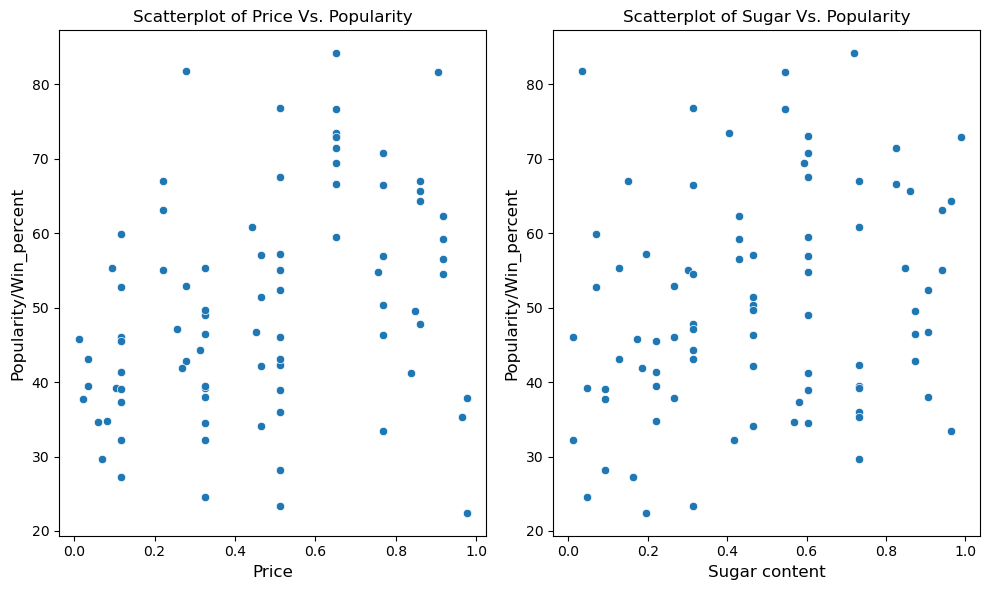

In [7]:
##From the above, both correlation are weak positive correlations. Thus, we cannot say the more Expensive/Sugar content a candy has, 
# the more popular they are. That is; price and sugar contents are not a dominant factor.But we can plot a scatterplot to get a clearer pic

##Plot subplots of both correlations
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

##Plot the scatterplot of Price Vs. Popularity
sns.scatterplot(x = 'pricepercent', y = 'winpercent', data = candy_data, ax = axes[0])
axes[0].set_xlabel('Price', fontsize = 12)
axes[0].set_ylabel('Popularity/Win_percent', fontsize = 12)
axes[0].set_title('Scatterplot of Price Vs. Popularity', fontsize = 12)

##Plot the scatterplot of Sugar contents Vs. Popularity
sns.scatterplot(x = 'sugarpercent', y = 'winpercent', data = candy_data, ax = axes[1])
axes[1].set_xlabel('Sugar content', fontsize = 12)
axes[1].set_ylabel('Popularity/Win_percent', fontsize = 12)
axes[1].set_title('Scatterplot of Sugar Vs. Popularity', fontsize = 12)

plt.tight_layout()
plt.show()

In [8]:
## From the above scatterplots, we observed that:
##1. There are expensive candies that are not popular, and also expensive candies that are clustering above (very popular).
# This thus re-affirm the earlier correlation coefficient we earlier calculated (weak positive correlation). 
# There's no clear trend or consistency, hence we conclude that price has some effect on popularity, though not dominant.

##2. There are also sugary candies that are quite popular, and not popular as well. There's no clear trend/consistent pattern on the scatterplot
# This further re-affirms the correlation coefficient (very weak positive correlation) calculated. Hence, sugar contents do have a positive
# effect on the popularity of candies, though negligible.

##3. lastly, between Sugar contents and Price, price has more effect on the popularity of candies

In [9]:
#3. Can you segment the candy into specific groups?
# We can segment the candies into specific groups: it can be on the basis of Price, Popularity, Sugar contents or other features.
# This is done thus:

#Set sugar-bins and labels
sugar_bins = [0, 0.33, 0.66, 1]
sugar_labels = ['Low Sugar', 'Moderate sugar', 'High Sugar']

#Set price-bins and labels
price_bins = [0, 33, 66, 100]
price_labels = ['Low Price', 'Moderate Price', 'High Price']

##Set Popularity bins and labels
popularity_bins = [0, 0.33, 0.66, 1]
popularity_labels = ['Low Popularity', 'Moderate Popularity', 'High Popularity']

##Set Segments
candy_data['Sugar Segments'] = pd.cut(candy_data['sugarpercent'], bins = sugar_bins, labels = sugar_labels, include_lowest = True)
candy_data['Price Segments'] = pd.cut(candy_data['pricepercent'], bins = price_bins, labels = price_labels, include_lowest = True)
candy_data['Popularity Segments'] = pd.cut(candy_data['winpercent'], bins = popularity_bins, labels = popularity_labels, include_lowest = True)

##Set segments based on features
features = candy_data.groupby(['chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat',	'crispedricewafer',	'hard',	'bar', 'pluribus'])

##eye-ball the segments
print('\nSugar Segments:')
print(candy_data[['competitorname', 'sugarpercent']].head())
print('\nPrice Segment')
print(candy_data[['competitorname', 'pricepercent']].head())
print('\nPopularity Segment')
print(candy_data[['competitorname', 'winpercent']].head())

for names, group in features:
    print(f'features: {names}')
    print(group[['competitorname', 'winpercent']])
    print('-' * 30)


Sugar Segments:
  competitorname  sugarpercent
0      100 Grand         0.732
1   3 Musketeers         0.604
2       One dime         0.011
3    One quarter         0.011
4      Air Heads         0.906

Price Segment
  competitorname  pricepercent
0      100 Grand         0.860
1   3 Musketeers         0.511
2       One dime         0.116
3    One quarter         0.511
4      Air Heads         0.511

Popularity Segment
  competitorname  winpercent
0      100 Grand   66.971725
1   3 Musketeers   67.602936
2       One dime   32.261086
3    One quarter   46.116505
4      Air Heads   52.341465
features: (0, 0, 0, 0, 0, 0, 0, 0, 0)
  competitorname  winpercent
2       One dime   32.261086
3    One quarter   46.116505
------------------------------
features: (0, 0, 0, 0, 0, 0, 0, 0, 1)
       competitorname  winpercent
8          Candy Corn   38.010963
19  Haribo Happy Cola   34.158958
48       Pixie Sticks   37.722336
------------------------------
features: (0, 0, 0, 0, 0, 0, 1, 0, 1)
   

In [10]:
#4. If you had to pick 3 candies to give out in Halloween, which would they be?
##We can make my pick on the basis of popularity, price, and an array of features
picked_candies = candy_data.sort_values(['winpercent','pricepercent'], ascending = [False, True])
picked_candies

##Select candies on the basis of diverse features
selected_candies = picked_candies.head(10)
selected = []

##Selected features 
selected_features = set()
for _, candy in selected_candies.iterrows():
    ##combine Key features into a tuple
    features = (candy['chocolate'], candy['fruity'], candy['caramel'], candy['peanutyalmondy'])
    if features not in selected_features:
        selected.append(candy)
        selected_features.add(features)
    if len(selected) == 3: ##Stop after selecting 3 candies
        break

##Display the selected candies
selected_halloween_candies = pd.DataFrame(selected)
print('\nCandies to give out for halloween are listed in below: ')
print(selected_halloween_candies[['competitorname', 'chocolate', 'fruity', 'caramel', 'peanutyalmondy', 'nougat', 'crispedricewafer', 'hard', 'bar', 
                                  'pluribus', 'sugarpercent', 'pricepercent', 'winpercent']])


Candies to give out for halloween are listed in below: 
               competitorname  chocolate  fruity  caramel  peanutyalmondy  \
52  Reese's Peanut Butter cup          1       0        0               1   
79                       Twix          1       0        1               0   
28                    Kit Kat          1       0        0               0   

    nougat  crispedricewafer  hard  bar  pluribus  sugarpercent  pricepercent  \
52       0                 0     0    0         0         0.720         0.651   
79       0                 1     0    1         0         0.546         0.906   
28       0                 1     0    1         0         0.313         0.511   

    winpercent  
52   84.180290  
79   81.642914  
28   76.768600  
